In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils.norb_loader
import os

%matplotlib inline

sns.set(style='white', rc={'figure.figsize': (12, 10)})

In [2]:
if not os.path.isdir('norb-small'):
    os.mkdir('norb-small')

Download the data files. This may take a little while to complete.

In [3]:
if not os.path.isfile('norb-small/smallnorb-5x46789x9x18x6x2x96x96-training-dat.mat'):
    !wget -O norb-small/smallnorb-5x46789x9x18x6x2x96x96-training-dat.mat.gz https://cs.nyu.edu/~ylclab/data/norb-v1.0-small/smallnorb-5x46789x9x18x6x2x96x96-training-dat.mat.gz
    !wget -O norb-small/smallnorb-5x46789x9x18x6x2x96x96-training-cat.mat.gz https://cs.nyu.edu/~ylclab/data/norb-v1.0-small/smallnorb-5x46789x9x18x6x2x96x96-training-cat.mat.gz
    !wget -O norb-small/smallnorb-5x01235x9x18x6x2x96x96-testing-dat.mat.gz https://cs.nyu.edu/~ylclab/data/norb-v1.0-small/smallnorb-5x01235x9x18x6x2x96x96-testing-dat.mat.gz
    !wget -O norb-small/smallnorb-5x01235x9x18x6x2x96x96-testing-cat.mat.gz https://cs.nyu.edu/~ylclab/data/norb-v1.0-small/smallnorb-5x01235x9x18x6x2x96x96-testing-cat.mat.gz    

Now unzip all the data files for loading.

In [4]:
if os.path.isfile('norb-small/smallnorb-5x46789x9x18x6x2x96x96-training-dat.mat.gz'):
    !gunzip -f norb-small/*.gz

In [5]:
!ls -lh norb-small/

total 1750000
-rw-r--r--  1 leland  staff    95K  8 Oct  2005 smallnorb-5x01235x9x18x6x2x96x96-testing-cat.mat
-rw-r--r--  1 leland  staff   427M  8 Oct  2005 smallnorb-5x01235x9x18x6x2x96x96-testing-dat.mat
-rw-r--r--  1 leland  staff    95K  8 Oct  2005 smallnorb-5x46789x9x18x6x2x96x96-training-cat.mat
-rw-r--r--  1 leland  staff   427M  8 Oct  2005 smallnorb-5x46789x9x18x6x2x96x96-training-dat.mat


In [6]:
train_data = utils.norb_loader.norb_data('train')
train_labels = utils.norb_loader.norb_labels('train')
# test_data = utils.norb_loader.norb_data('test')

In [7]:
#data = np.vstack([train_data, test_data])
data = train_data
data.shape

(48600, 9216)

## UMAP

In [8]:
import umap

In [15]:
%time u = umap.UMAP(n_neighbors=30).fit_transform(data)

CPU times: user 8min 49s, sys: 7.31 s, total: 8min 56s
Wall time: 8min 51s


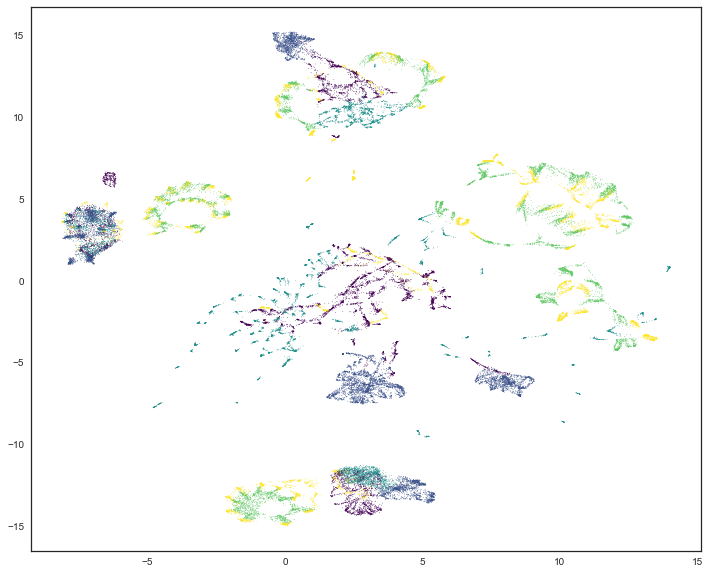

In [16]:
plt.scatter(u[:, 0], u[:, 1], s=0.1, c=train_labels, cmap='viridis')

## t-SNE

In [17]:
from sklearn.manifold import TSNE

In [18]:
%time t = TSNE(perplexity=60).fit_transform(data)

CPU times: user 4h 41min 18s, sys: 3min 3s, total: 4h 44min 22s
Wall time: 4h 44min 33s


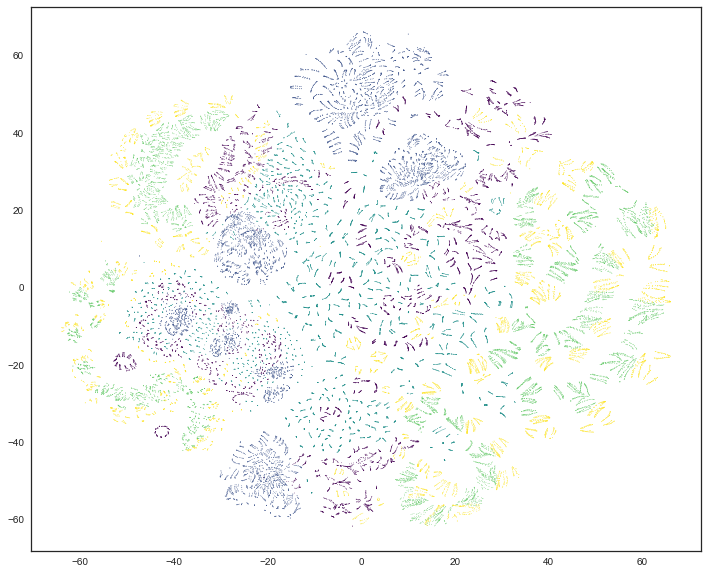

In [19]:
plt.scatter(t[:, 0], t[:, 1], s=0.1, c=train_labels, cmap='viridis')

In [20]:
np.save('norb_map.npy', u)
np.save('norn_tsne.npy', t)

We can achieve something more akin to t-SNE by focussing more on local neighborhoods and not packing points as tightly in the embedding.

In [27]:
%time u5 = umap.UMAP(n_neighbors=6, min_dist=0.25).fit_transform(data)

CPU times: user 12min 9s, sys: 9.14 s, total: 12min 18s
Wall time: 7min 53s


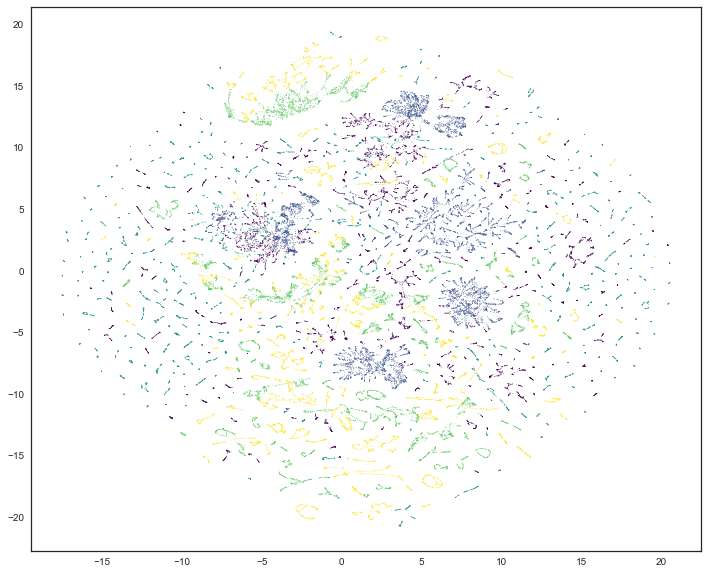

In [28]:
plt.scatter(u5[:, 0], u5[:, 1], s=0.1, c=train_labels, cmap='viridis')